#Data Loading and Exploration

In [1]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime

In [2]:
from google.colab import drive
import pandas as pd


file_path = "/content/Egypt 2010-01-01 to 2024-09-12.csv"
data = pd.read_csv(file_path)



ModuleNotFoundError: No module named 'google.colab'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data.head()

,Unnamed: 0,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,0,egypt,2010-01-01,25.0,15.0,19.3,25.0,15.0,19.3,11.4,...,14.6,6,NaN,2010-01-01T06:51:08,2010-01-01T17:06:05,0.52,Clear,Clear conditions throughout the day.,clear-day,"HECA,62366099999"
1,1,egypt,2010-01-02,25.0,14.3,20.3,25.0,14.3,20.3,9.1,...,14.2,6,NaN,2010-01-02T06:51:22,2010-01-02T17:06:48,0.56,Clear,Clear conditions throughout the day.,clear-day,"HECA,62366099999"
2,2,egypt,2010-01-03,22.0,16.0,18.6,22.0,16.0,18.6,9.7,...,14.2,6,NaN,2010-01-03T06:51:34,2010-01-03T17:07:32,0.59,Clear,Clear conditions throughout the day.,clear-day,"HECA,62366099999"
3,3,egypt,2010-01-04,20.0,13.0,16.7,20.0,13.0,16.7,10.6,...,14.6,6,NaN,2010-01-04T06:51:45,2010-01-04T17:08:16,0.62,Clear,Clear conditions throughout the day.,clear-day,"HECA,62366099999"
4,4,egypt,2010-01-05,21.0,13.0,16.8,21.0,13.0,16.8,11.0,...,14.7,6,NaN,2010-01-05T06:51:54,2010-01-05T17:09:01,0.66,Clear,Clear conditions throughout the day.,clear-day,"HECA,62366099999"


In [ ]:
data.shape

(5369, 34)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5369 non-null   int64  
 1   name              5369 non-null   object 
 2   datetime          5369 non-null   object 
 3   tempmax           5369 non-null   float64
 4   tempmin           5369 non-null   float64
 5   temp              5369 non-null   float64
 6   feelslikemax      5369 non-null   float64
 7   feelslikemin      5369 non-null   float64
 8   feelslike         5369 non-null   float64
 9   dew               5369 non-null   float64
 10  humidity          5369 non-null   float64
 11  precip            5369 non-null   float64
 12  precipprob        5369 non-null   int64  
 13  precipcover       5369 non-null   float64
 14  preciptype        367 non-null    object 
 15  snow              3543 non-null   float64
 16  snowdepth         3543 non-null   float64


In [ ]:
data.describe()

,Unnamed: 0,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,...,5369.000000,5369.000000,5369.000000,5369.000000,5368.000000,5369.000000,5369.000000,5369.000000,977.000000,5369.00000
mean,388.211026,38.471950,27.255839,32.635910,38.209220,27.194431,32.725312,19.753958,53.755243,0.056483,...,23.016633,181.726169,1013.821866,22.112796,7.902235,254.389775,21.660384,8.333582,10.015353,0.48252
std,231.598086,22.716248,19.826714,21.148042,22.567977,20.026694,21.283450,17.584566,11.675684,0.756638,...,9.963796,139.992989,4.800115,19.749948,1.894183,75.879170,6.408381,1.697480,0.697456,0.28879
min,0.000000,10.000000,2.000000,7.800000,10.000000,-4.400000,5.700000,-7.900000,11.000000,0.000000,...,4.700000,0.000000,998.600000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.00000
25%,191.000000,24.000000,15.000000,19.200000,24.000000,15.000000,19.200000,8.700000,48.100000,0.000000,...,16.600000,30.500000,1010.100000,4.900000,6.200000,183.900000,15.700000,7.000000,10.000000,0.25000
50%,383.000000,32.000000,21.000000,26.400000,31.000000,21.000000,26.000000,14.400000,55.600000,0.000000,...,22.300000,213.800000,1013.500000,18.000000,8.300000,264.800000,22.600000,9.000000,10.000000,0.50000
75%,575.000000,37.000000,25.800000,30.700000,37.200000,25.800000,31.600000,19.700000,60.700000,0.000000,...,27.700000,326.300000,1017.100000,34.100000,9.700000,324.600000,27.700000,10.000000,10.000000,0.75000
max,985.000000,109.400000,86.000000,96.600000,109.800000,91.900000,98.400000,71.600000,97.900000,44.100000,...,309.600000,360.000000,1030.000000,93.300000,10.400000,386.300000,32.000000,10.000000,30.000000,0.98000


In [ ]:
data.isna().sum()

,0
Unnamed: 0,0
name,0
datetime,0
tempmax,0
tempmin,0
temp,0
feelslikemax,0
feelslikemin,0
feelslike,0
dew,0


In [ ]:
data.sample(5)

,Unnamed: 0,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
2452,261,Egypt,2016-09-18,33.0,23.0,28.1,32.3,23.0,28.3,18.9,...,22.9,9,NaN,2016-09-18T05:41:15,2016-09-18T17:56:28,0.56,Clear,Clear conditions throughout the day.,clear-day,"HECA,62366099999"
1850,389,Egypt,2015-01-25,21.0,12.9,16.5,21.0,12.9,16.5,11.3,...,14.3,7,NaN,2015-01-25T06:49:13,2015-01-25T17:25:41,0.17,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"HECA,62366099999"
2115,654,Egypt,2015-10-17,30.9,20.0,25.2,31.7,20.0,25.5,18.0,...,19.2,8,NaN,2015-10-17T05:57:51,2015-10-17T17:22:41,0.15,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"HECA,62366099999"
1476,15,Egypt,2014-01-16,22.0,10.0,15.8,22.0,10.0,15.8,2.9,...,15.4,7,NaN,2014-01-16T06:51:44,2014-01-16T17:18:03,0.50,Clear,Clear conditions throughout the day.,clear-day,"HECA,62366099999"
956,226,egypt,2012-08-14,34.0,25.0,29.3,35.9,25.0,30.0,18.8,...,27.5,10,NaN,2012-08-14T05:21:50,2012-08-14T18:37:02,0.90,Clear,Clear conditions throughout the day.,clear-day,"HECA,62366099999"


In [ ]:
data.columns

Index(['Unnamed: 0', 'name', 'datetime', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions',
       'description', 'icon', 'stations'],
      dtype='object')

#Data Cleaning

###a. Remove unnecessary columns

In [ ]:
data=data.drop(['Unnamed: 0'],axis=1)

In [ ]:
data=data.drop(['severerisk'],axis=1)

In [ ]:
data= data.drop(['name'] ,axis=1 )

In [ ]:
data= data.drop(['snow'],axis=1)

In [ ]:
data = data.drop(['snowdepth'],axis=1)

In [ ]:
data = data.drop(['preciptype'],axis=1)

###b. Handle missing values

In [ ]:
data['windgust'].isna().sum()

1813

In [ ]:
data['windgust']= data['windgust'].fillna(data['windgust'].median())

In [ ]:
data.isna().sum()

,0
datetime,0
tempmax,0
tempmin,0
temp,0
feelslikemax,0
feelslikemin,0
feelslike,0
dew,0
humidity,0
precip,0


In [ ]:
data.dropna(subset=['visibility'], inplace=True)

In [ ]:
data.shape

(5368, 28)

###c. Check for duplicates

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(5368, 28)

#Convert Data Types

In [ ]:
# Convert 'datetime' column to actual datetime format
data['datetime'] = pd.to_datetime(data['datetime'])

In [ ]:
data['sunset'] = pd.to_datetime(data['sunset'])

In [ ]:
data['sunrise'] = pd.to_datetime(data['sunrise'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5368 entries, 0 to 5368
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          5368 non-null   datetime64[ns]
 1   tempmax           5368 non-null   float64       
 2   tempmin           5368 non-null   float64       
 3   temp              5368 non-null   float64       
 4   feelslikemax      5368 non-null   float64       
 5   feelslikemin      5368 non-null   float64       
 6   feelslike         5368 non-null   float64       
 7   dew               5368 non-null   float64       
 8   humidity          5368 non-null   float64       
 9   precip            5368 non-null   float64       
 10  precipprob        5368 non-null   int64         
 11  precipcover       5368 non-null   float64       
 12  windgust          5368 non-null   float64       
 13  windspeed         5368 non-null   float64       
 14  winddir           5368 non-nu

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

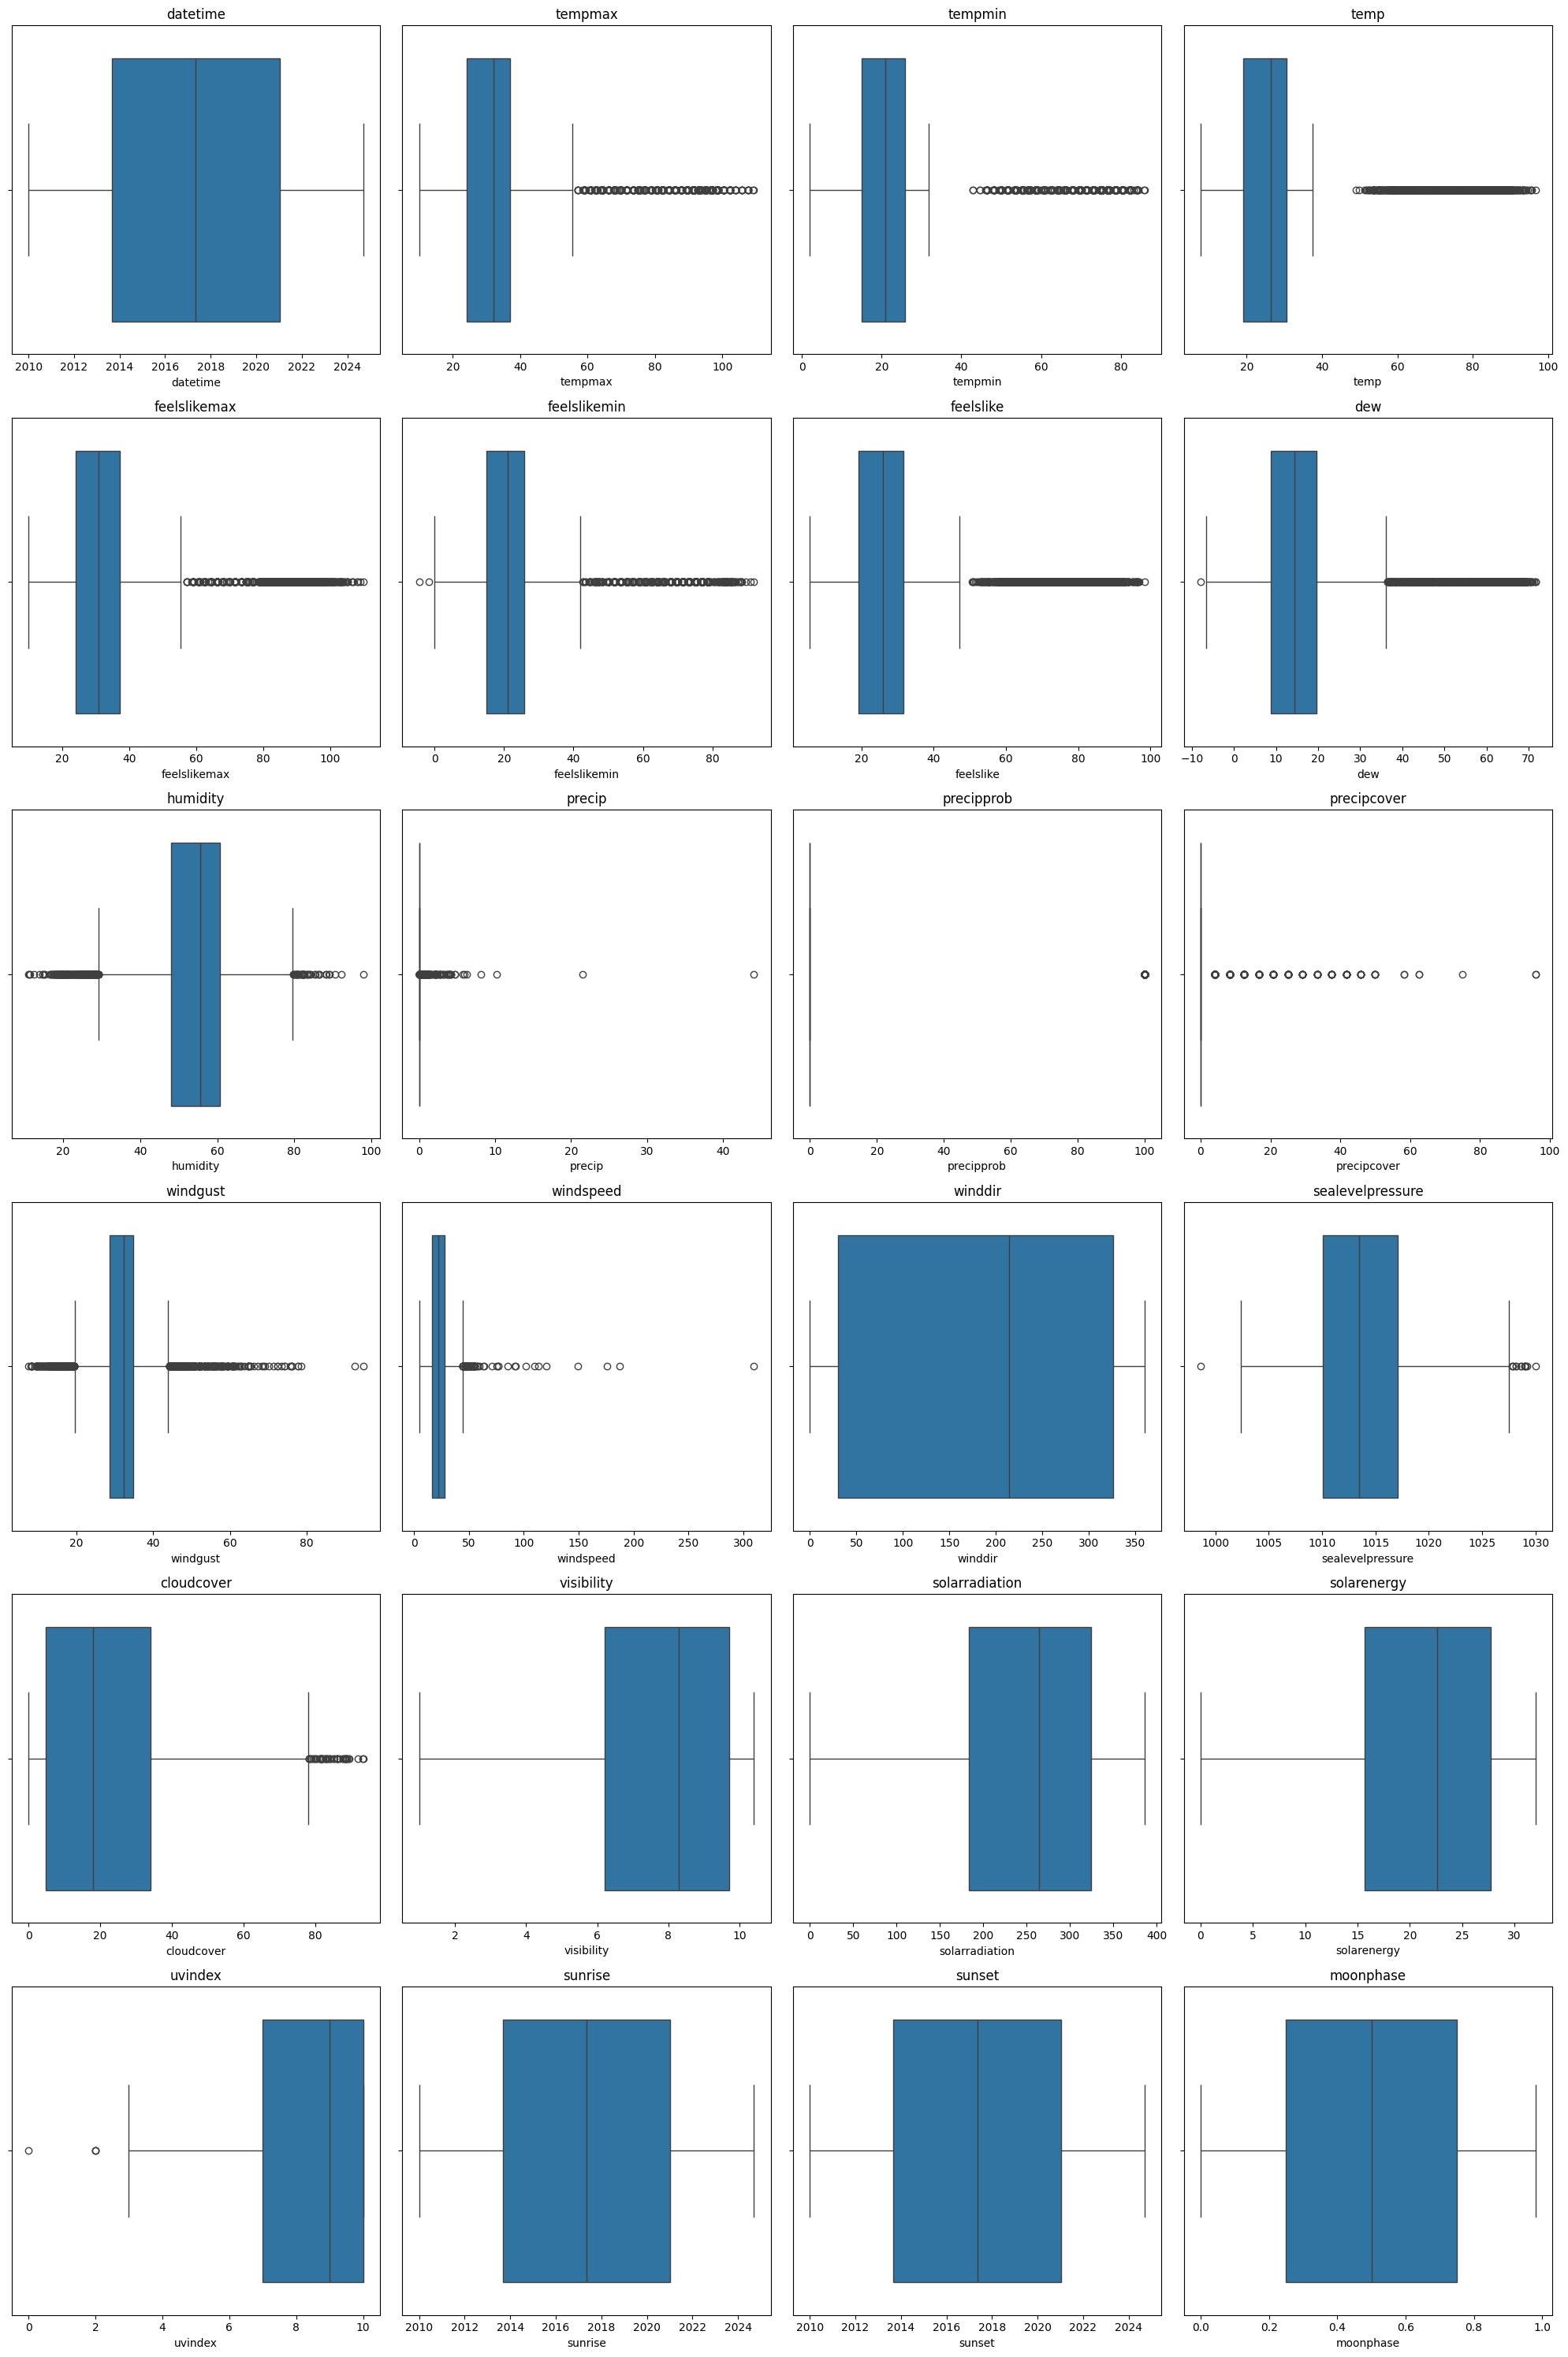

In [ ]:
num_columns = data.describe().columns
num_rows = int(np.ceil(len(num_columns) / 4))  # Using 4 columns per row
plt.figure(figsize=(20, num_rows * 5))
for i, column in enumerate(num_columns):
    plt.subplot(num_rows, 4, i + 1)
    sns.boxplot(x=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [ ]:
min_values = data.min()
max_values = data.max()
df = pd.DataFrame({'Min': min_values, 'Max': max_values})
print(df)

                                                                Min  \
datetime                                        2010-01-01 00:00:00   
tempmax                                                        10.0   
tempmin                                                         2.0   
temp                                                            7.8   
feelslikemax                                                   10.0   
feelslikemin                                                   -4.4   
feelslike                                                       5.7   
dew                                                            -7.9   
humidity                                                       11.0   
precip                                                          0.0   
precipprob                                                        0   
precipcover                                                     0.0   
windgust                                                        7.6   
windsp

#Handling Outliers

In [ ]:
# IQR method to clamp outliers
def outliers_clamping(col, value):
    Q1 = np.percentile(data[col], q = 25, interpolation = 'midpoint')
    Q3 = np.percentile(data[col], q = 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    Upper_Bound = Q3 + 1.5*IQR
    Lower_Bound = Q1 - 1.5*IQR
    if value > Upper_Bound:
        return Upper_Bound
    elif value<Lower_Bound:
        return Lower_Bound
    else:
        return value

In [ ]:
num_cols=data.describe().columns
for col in num_cols:
  data[col] = data[col].apply(lambda x: outliers_clamping(col, x))

<ipython-input-33-5a322dbaebbf>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  data[col] = data[col].apply(lambda x: outliers_clamping(col, x))
<ipython-input-33-5a322dbaebbf>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  data[col] = data[col].apply(lambda x: outliers_clamping(col, x))
<ipython-input-33-5a322dbaebbf>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)

In [ ]:
corr= data.select_dtypes(exclude=['object']).corr()

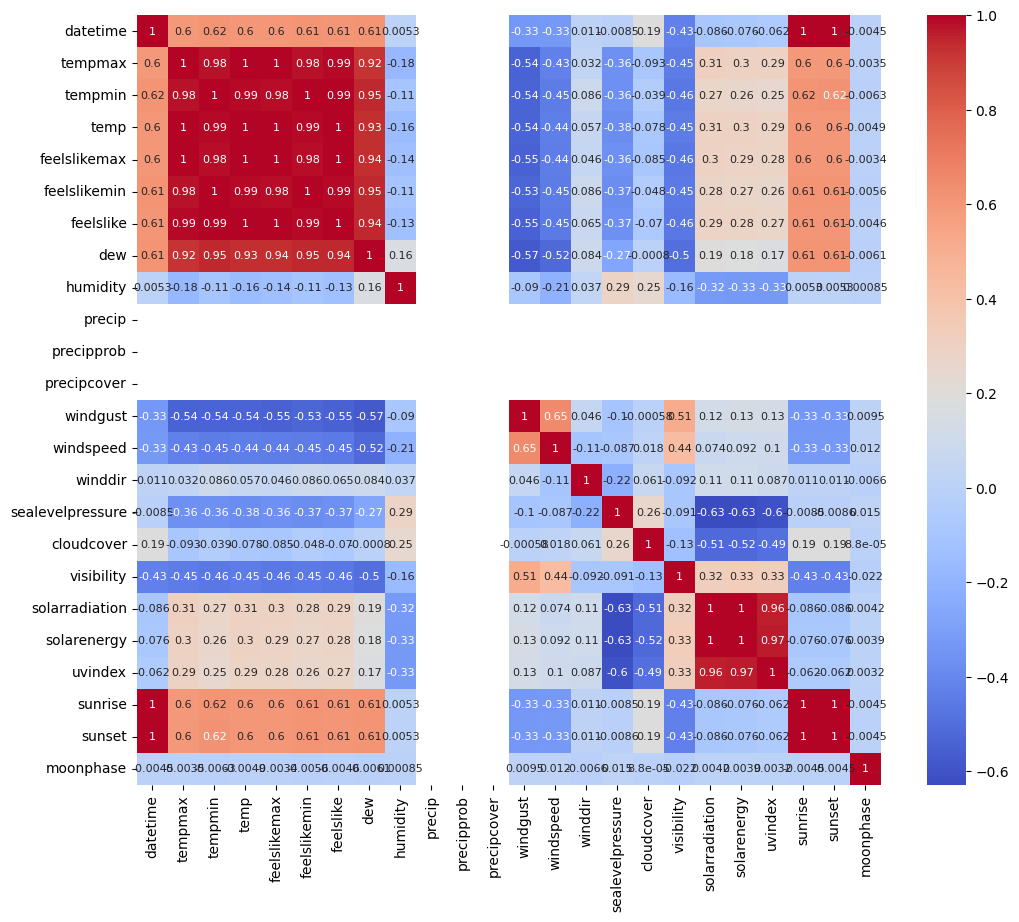

'\nWhite (or light colors) usually represent correlations close to zero, meaning there is little to no linear relationship between the variables.\n'

In [ ]:
plt.figure(figsize=(12, 10))
plt.xticks(rotation=90)
sns.heatmap(corr, annot= True,cmap='coolwarm', annot_kws={'size': 8})
plt.show()

'''
White (or light colors) usually represent correlations close to zero, meaning there is little to no linear relationship between the variables.
'''

In [ ]:
data.columns

Index(['datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'sunrise', 'sunset', 'moonphase', 'conditions', 'description', 'icon',
       'stations'],
      dtype='object')

In [ ]:
data.columns

Index(['datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'sunrise', 'sunset', 'moonphase', 'conditions', 'description', 'icon',
       'stations'],
      dtype='object')

In [ ]:
print(data['precipcover'].describe())

count    5368.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: precipcover, dtype: float64


In [ ]:
data['precipcover'].head(30)


,precipcover
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [ ]:
data['precipcover'].unique()

array([0.])

In [ ]:
data.drop(['precipcover'],axis=1,inplace=True)

In [ ]:
data['precipprob'].unique()

array([0.])

In [ ]:
data.drop(['precipprob'],axis=1,inplace=True)

In [ ]:
data['precip'].unique()

array([0.])

In [ ]:
data.drop(['precip'],axis=1,inplace=True)

In [ ]:
data.drop(['tempmax','tempmin'], axis=1, inplace = True)

In [ ]:
data.drop(['feelslikemin','feelslike','feelslikemax'], axis= 1 , inplace=True)

In [ ]:
data['conditions'].unique()

array(['Clear', 'Partially cloudy', 'Rain', 'Rain, Partially cloudy',
       'Overcast', 'Rain, Overcast'], dtype=object)

In [ ]:
data['icon'].unique()

array(['clear-day', 'partly-cloudy-day', 'rain', 'wind', 'cloudy'],
      dtype=object)

In [ ]:
data['description'].unique()

array(['Clear conditions throughout the day.',
       'Partly cloudy throughout the day.',
       'Becoming cloudy in the afternoon.',
       'Clear conditions throughout the day with rain.',
       'Partly cloudy throughout the day with early morning rain.',
       'Clearing in the afternoon.',
       'Partly cloudy throughout the day with rain.',
       'Partly cloudy throughout the day with morning rain.',
       'Partly cloudy throughout the day with late afternoon rain.',
       'Partly cloudy throughout the day with rain in the morning and afternoon.',
       'Partly cloudy throughout the day with rain clearing later.',
       'Partly cloudy throughout the day with a chance of rain throughout the day.',
       'Clear conditions throughout the day with morning rain.',
       'Clear conditions throughout the day with late afternoon rain.',
       'Becoming cloudy in the afternoon with rain in the morning and afternoon.',
       'Clear conditions throughout the day with rain clearin

In [ ]:
data.drop(['description'],axis=1,inplace=True)

In [ ]:
data['stations'].unique()

array(['HECA,62366099999', 'HECA,remote,62366099999',
       '62363099999,HECA,62366099999', 'HECA,62378099999,62366099999',
       '62375099999,HECA,62366099999', '62368099999,HECA,62366099999',
       '62360099999,HECA,62366099999', '62366099999', 'HECA',
       'HECA,remote'], dtype=object)

In [ ]:
data.drop(['stations'],axis=1,inplace=True)

In [ ]:
data['Day'] =data['datetime'].dt.day
data['Month'] = data['datetime'].dt.month
data['Year'] = data['datetime'].dt.year

In [ ]:
data.head()

,datetime,temp,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,...,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,icon,Day,Month,Year
0,2010-01-01,19.3,11.4,61.9,32.4,14.8,205.0,1019.1,6.5,5.8,...,14.6,6.0,2010-01-01 06:51:08,2010-01-01 17:06:05,0.52,Clear,clear-day,1,1,2010
1,2010-01-02,20.3,9.1,50.2,32.4,27.7,202.2,1016.5,14.2,5.1,...,14.2,6.0,2010-01-02 06:51:22,2010-01-02 17:06:48,0.56,Clear,clear-day,2,1,2010
2,2010-01-03,18.6,9.7,56.3,32.4,16.6,263.0,1017.0,11.1,8.4,...,14.2,6.0,2010-01-03 06:51:34,2010-01-03 17:07:32,0.59,Clear,clear-day,3,1,2010
3,2010-01-04,16.7,10.6,68.1,32.4,13.0,324.2,1018.8,17.6,6.8,...,14.6,6.0,2010-01-04 06:51:45,2010-01-04 17:08:16,0.62,Clear,clear-day,4,1,2010
4,2010-01-05,16.8,11.0,70.0,32.4,20.5,34.0,1020.1,19.8,6.1,...,14.7,6.0,2010-01-05 06:51:54,2010-01-05 17:09:01,0.66,Clear,clear-day,5,1,2010


In [ ]:
corr= data.select_dtypes(exclude=['object']).corr()

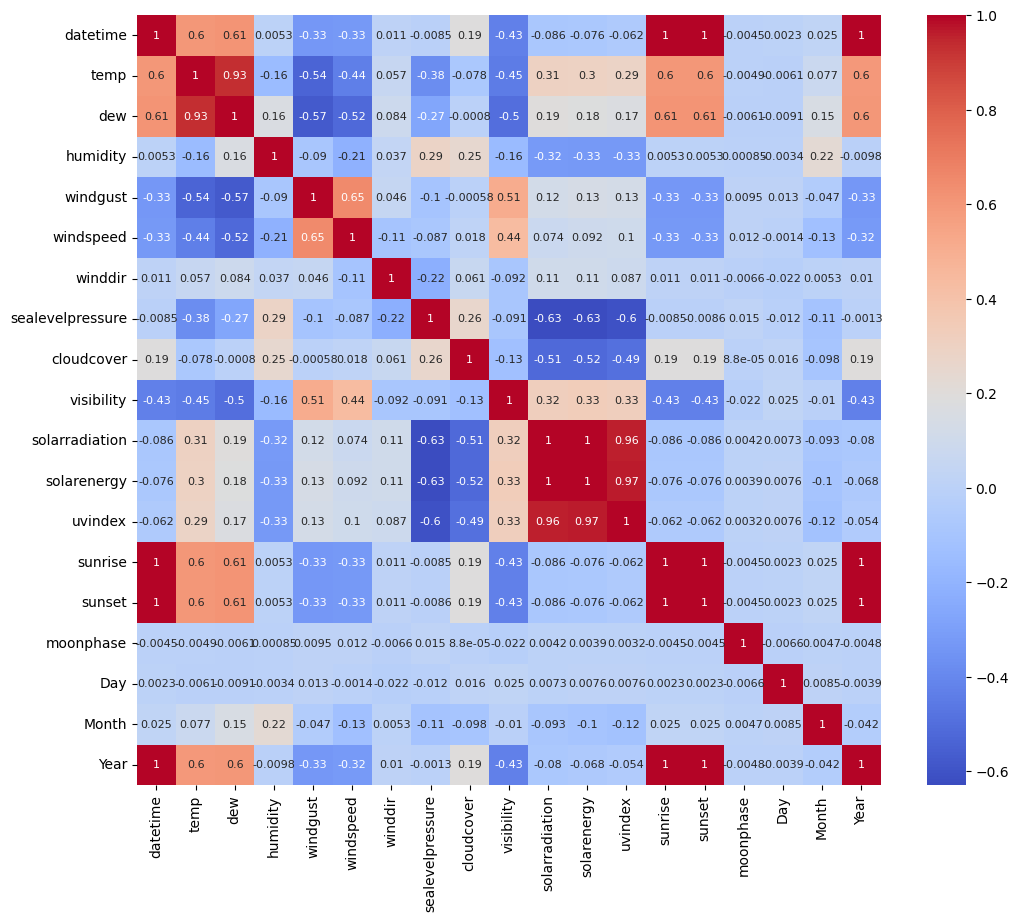

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot= True,cmap='coolwarm', annot_kws={'size': 8})
plt.show()

##Visualizing Feature Distributions

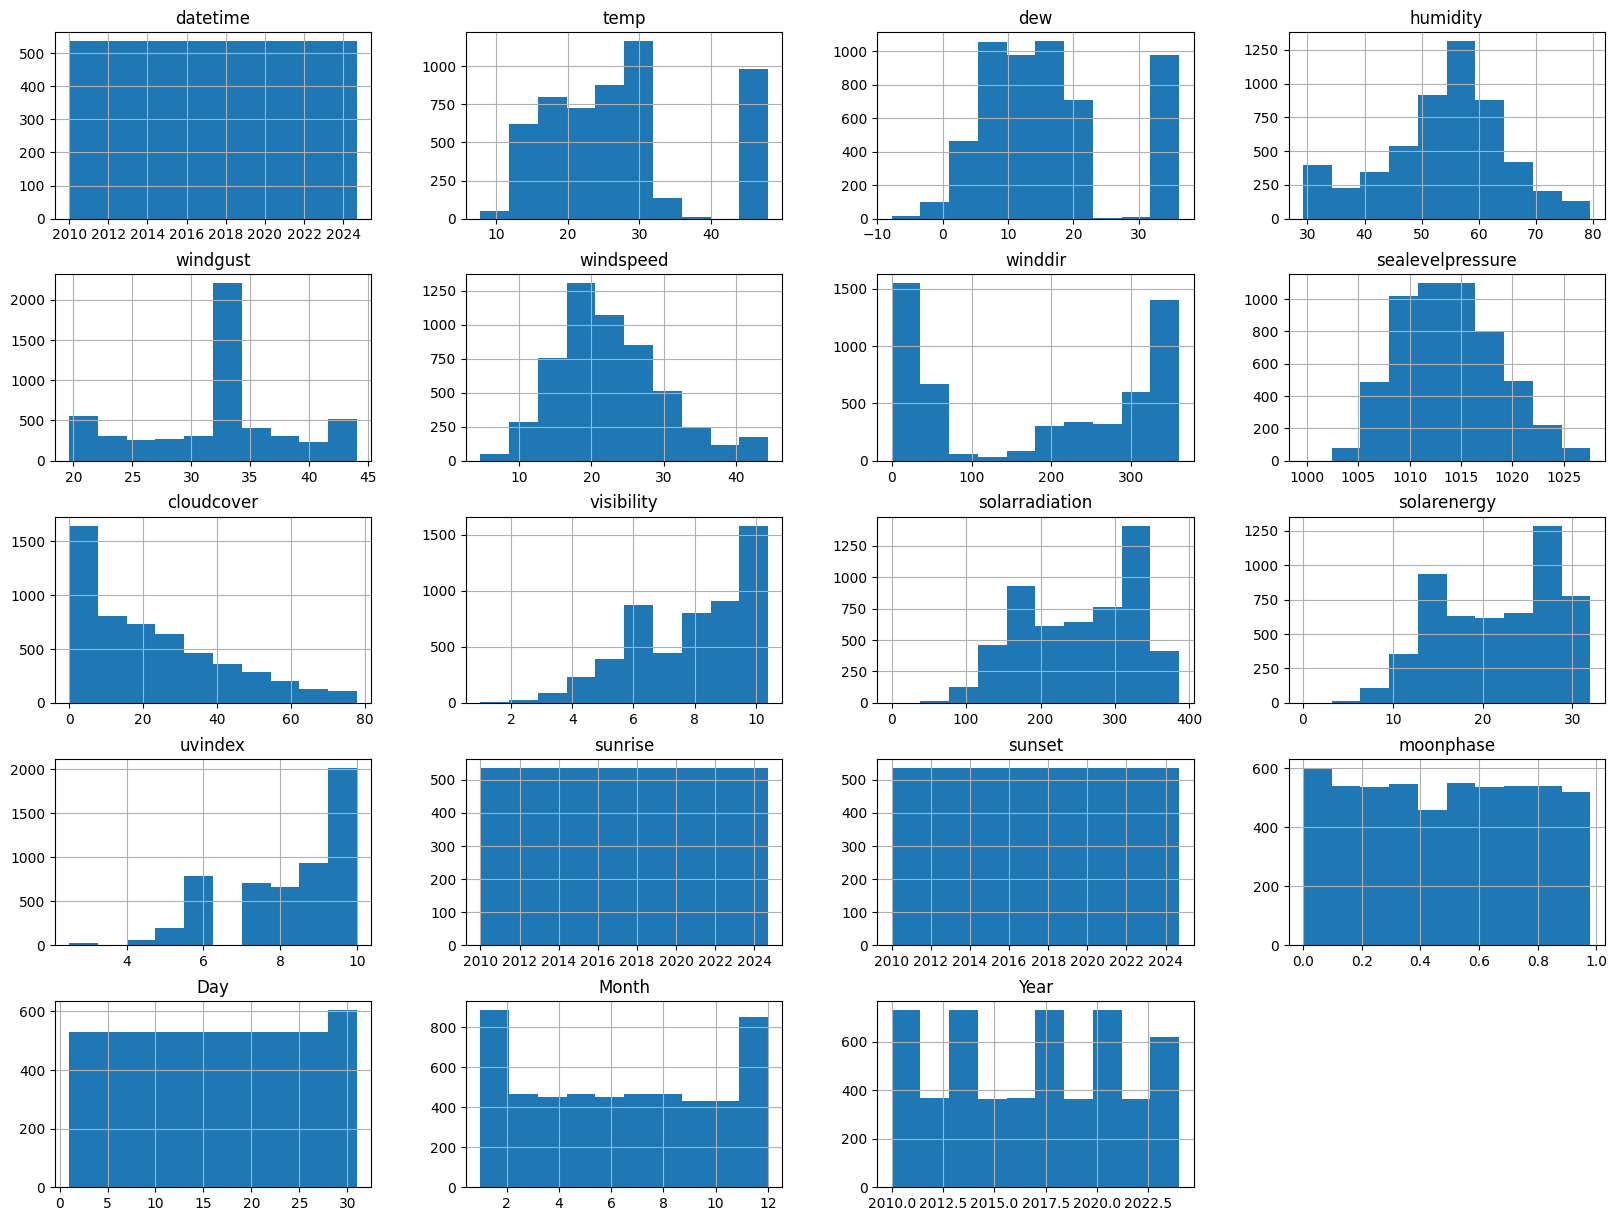

In [ ]:
data.hist(figsize=(20, 15))
plt.show()


##Outlier Detection and Visualization Using Boxplots

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

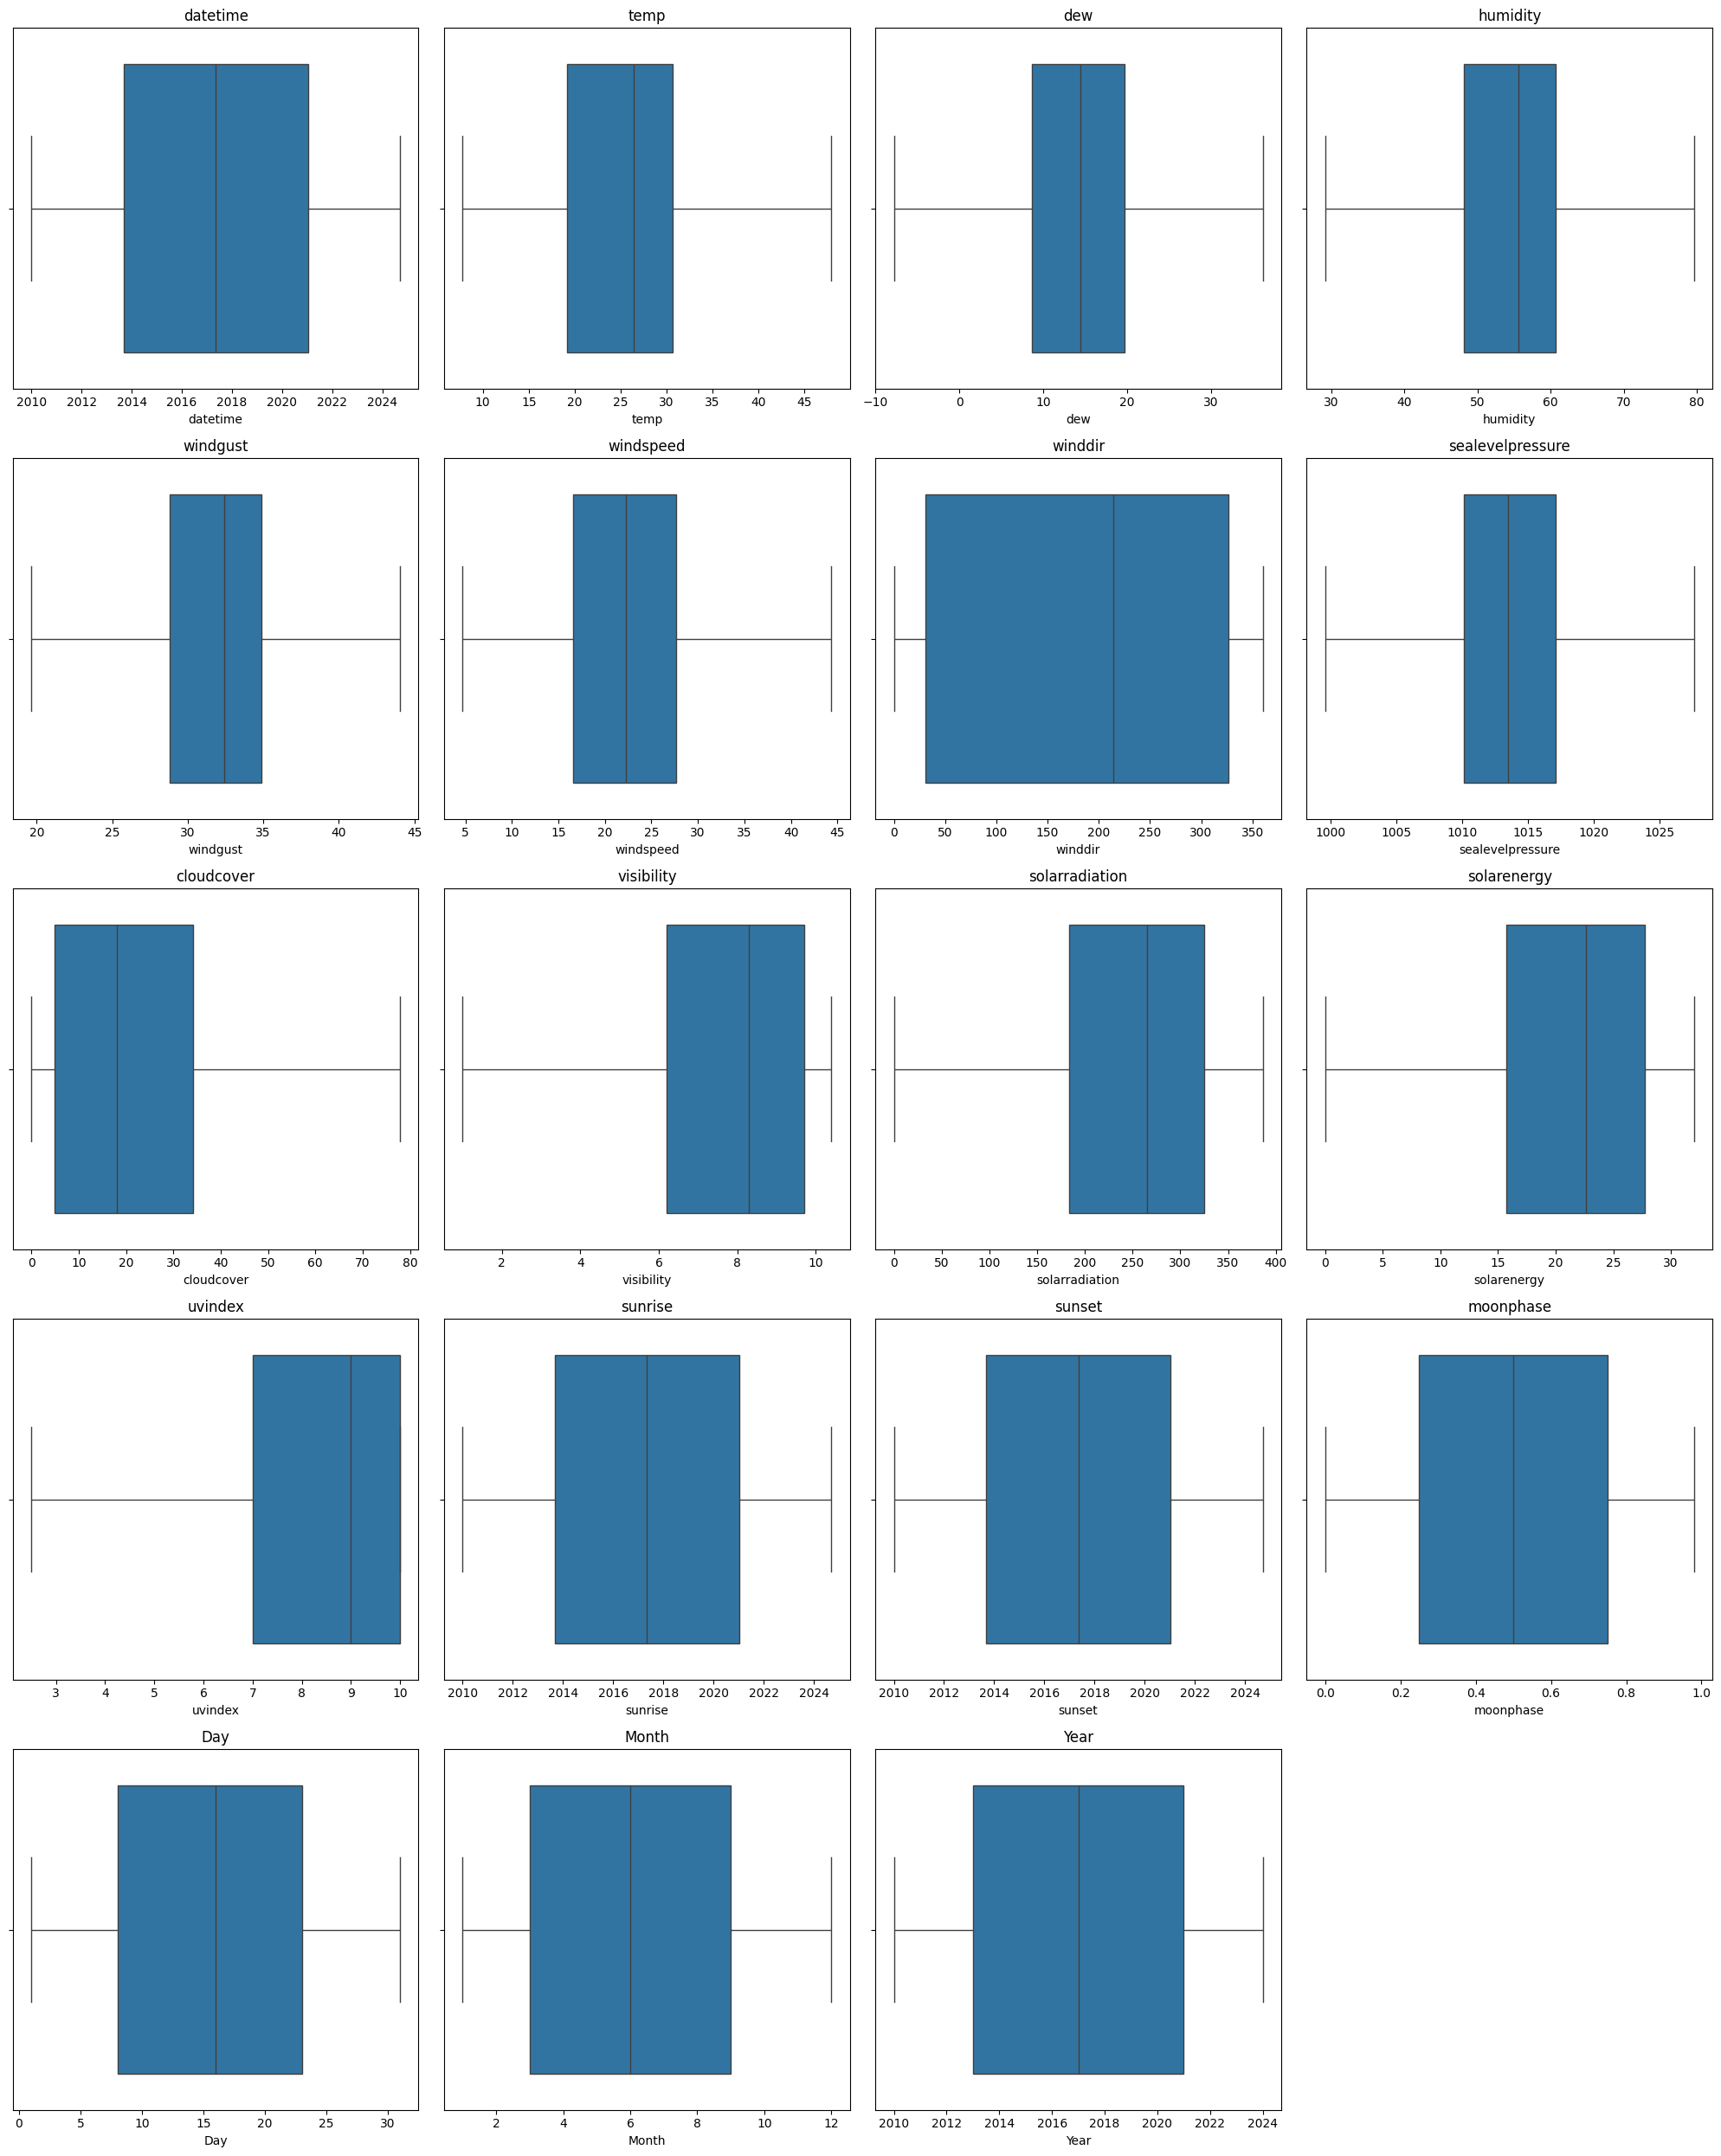

In [ ]:
num_columns = data.describe().columns
num_rows = int(np.ceil(len(num_columns) / 4))  # Using 4 columns per row
plt.figure(figsize=(20, num_rows * 5))
for i, column in enumerate(num_columns):
    plt.subplot(num_rows, 4, i + 1)
    sns.boxplot(x=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [ ]:
data.shape

(5368, 21)

# Data Analysis Process

###Distribution of icon Type

<ipython-input-58-108e43c70782>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='icon', data=data , palette = 'Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-li

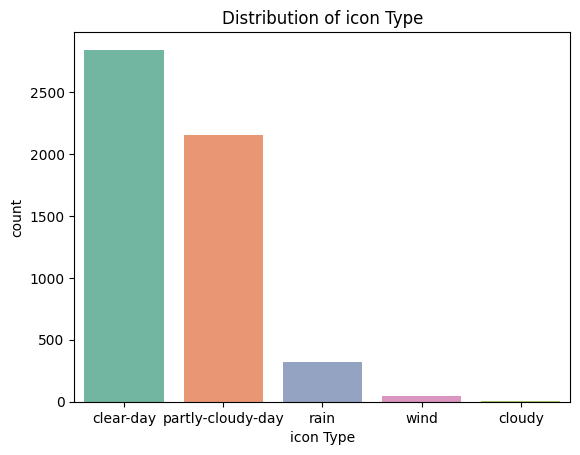

In [ ]:
sns.countplot(x='icon', data=data , palette = 'Set2')
plt.title('Distribution of icon Type')
plt.xlabel('icon Type')
plt.show()

###Grouping the features of interest by month

Text(0.5, 0, 'Month')

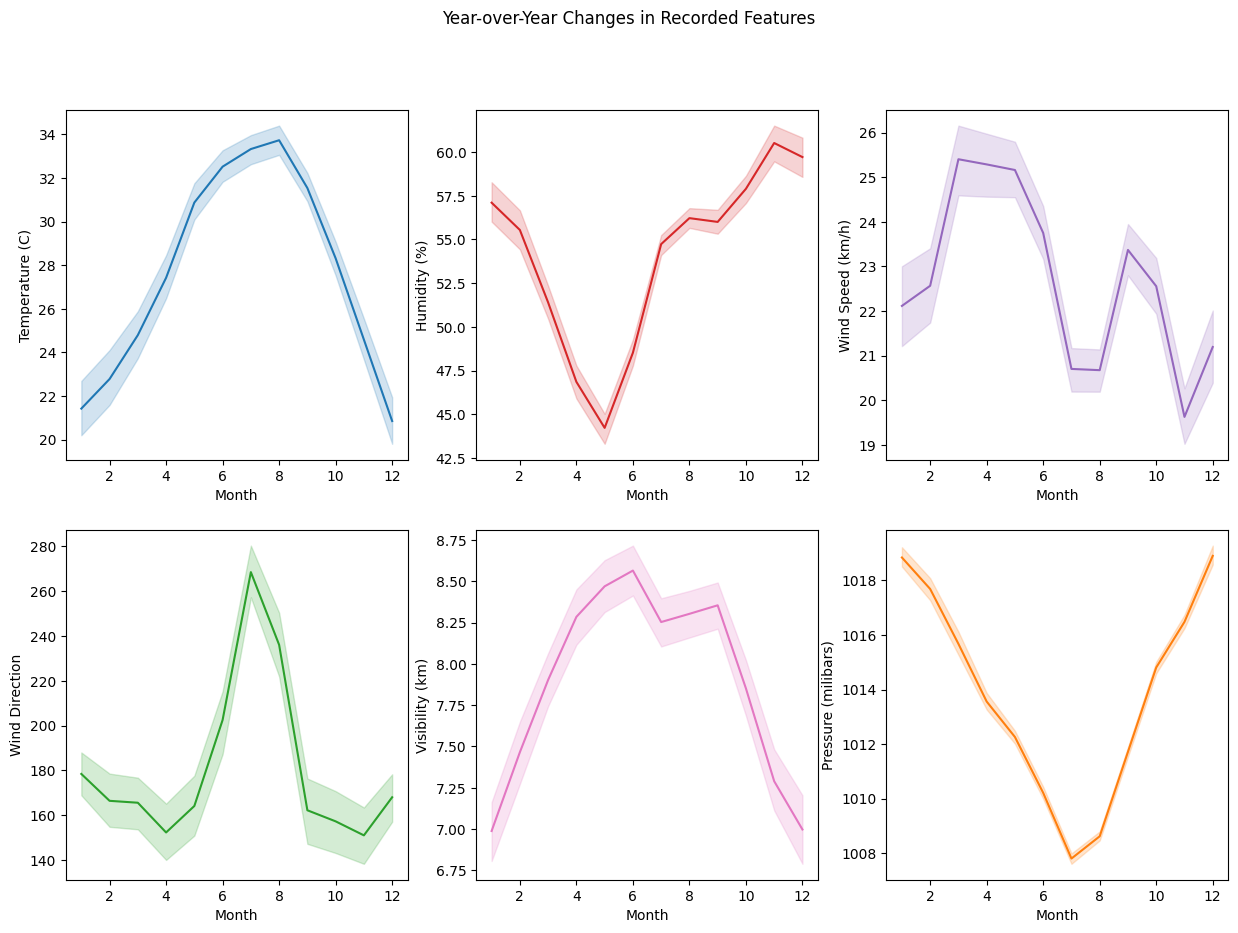

In [ ]:
monthly_data = data.groupby((data['Month']))[[
    'temp',
    'humidity',
    'windspeed',
    'winddir',
    'sealevelpressure',
    'visibility'
]]
# Creating subplot layout
fig, ax = plt.subplots(2,3, figsize=(15,10))

# Main figure title
fig.suptitle('Year-over-Year Changes in Recorded Features')
# Temperature line plot
sns.lineplot(x='Month', y='temp', data=data, color='tab:blue', ax=ax[0,0])
ax[0,0].set_ylabel('Temperature (C)')
ax[0,0].set_xlabel('Month')

# Humidity line plot
sns.lineplot(x='Month', y='humidity', data=data, color='tab:red', ax=ax[0,1])
ax[0,1].set_ylabel('Humidity (%)')
ax[0,1].set_xlabel('Month')

# Wind speed line plot
sns.lineplot(x='Month', y='windspeed', data=data, color='tab:purple', ax=ax[0,2])
ax[0,2].set_ylabel('Wind Speed (km/h)')
ax[0,2].set_xlabel('Month')

# Wind bearing line plot
sns.lineplot(x='Month', y='winddir', data=data, color='tab:green', ax=ax[1,0])
ax[1,0].set_ylabel('Wind Direction')
ax[1,0].set_xlabel('Month')

# Visibility line plot
sns.lineplot(x='Month', y='visibility', data=data, color='tab:pink', ax=ax[1,1])
ax[1,1].set_ylabel('Visibility (km)')
ax[1,1].set_xlabel('Month')

# Pressure line plot
sns.lineplot(x='Month', y='sealevelpressure', data=data, color='tab:orange', ax=ax[1,2])
ax[1,2].set_ylabel('Pressure (milibars)')
ax[1,2].set_xlabel('Month')

### Grouping the features of interest by year

Text(0.5, 0, 'Year')

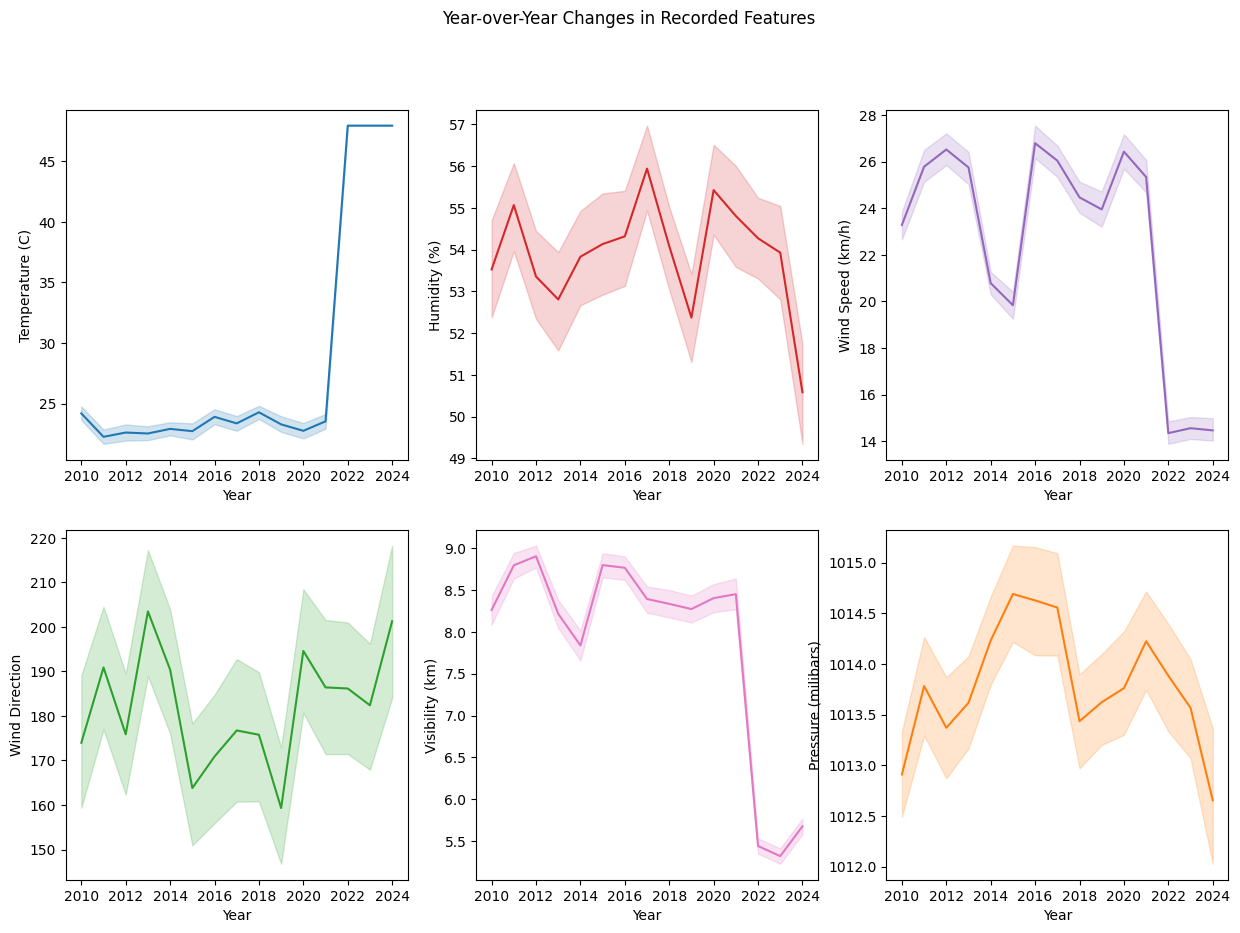

In [ ]:
monthly_data = data.groupby((data['Year']))[[
    'temp',
    'humidity',
    'windspeed',
    'winddir',
    'sealevelpressure',
    'visibility'
]]

# Creating subplot layout
fig, ax = plt.subplots(2,3, figsize=(15,10))

# Main figure title
fig.suptitle('Year-over-Year Changes in Recorded Features')
# Temperature line plot
sns.lineplot(x='Year', y='temp', data=data, color='tab:blue', ax=ax[0,0])
ax[0,0].set_ylabel('Temperature (C)')
ax[0,0].set_xlabel('Year')

# Humidity line plot
sns.lineplot(x='Year', y='humidity', data=data, color='tab:red', ax=ax[0,1])
ax[0,1].set_ylabel('Humidity (%)')
ax[0,1].set_xlabel('Year')

# Wind speed line plot
sns.lineplot(x='Year', y='windspeed', data=data, color='tab:purple', ax=ax[0,2])
ax[0,2].set_ylabel('Wind Speed (km/h)')
ax[0,2].set_xlabel('Year')

# Wind bearing line plot
sns.lineplot(x='Year', y='winddir', data=data, color='tab:green', ax=ax[1,0])
ax[1,0].set_ylabel('Wind Direction')
ax[1,0].set_xlabel('Year')

# Visibility line plot
sns.lineplot(x='Year', y='visibility', data=data, color='tab:pink', ax=ax[1,1])
ax[1,1].set_ylabel('Visibility (km)')
ax[1,1].set_xlabel('Year')

# Pressure line plot
sns.lineplot(x='Year', y='sealevelpressure', data=data, color='tab:orange', ax=ax[1,2])
ax[1,2].set_ylabel('Pressure (milibars)')
ax[1,2].set_xlabel('Year')

### insight
Pressure: High Air Pressure (or high-pressure systems): These usually bring clear skies, calm weather, and dry conditions.
Low Air Pressure (or low-pressure systems): These often lead to cloudy, windy, and rainy conditions, sometimes resulting in storms or more turbulent weather.

###Frequently Temperature

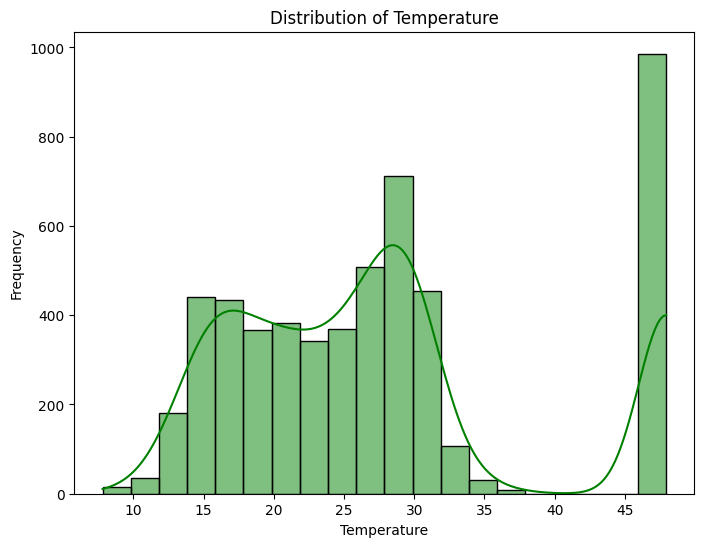

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data['temp'], bins=20, kde=True , color = 'green')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()



```
# This is formatted as code
```

###Condition Frequency

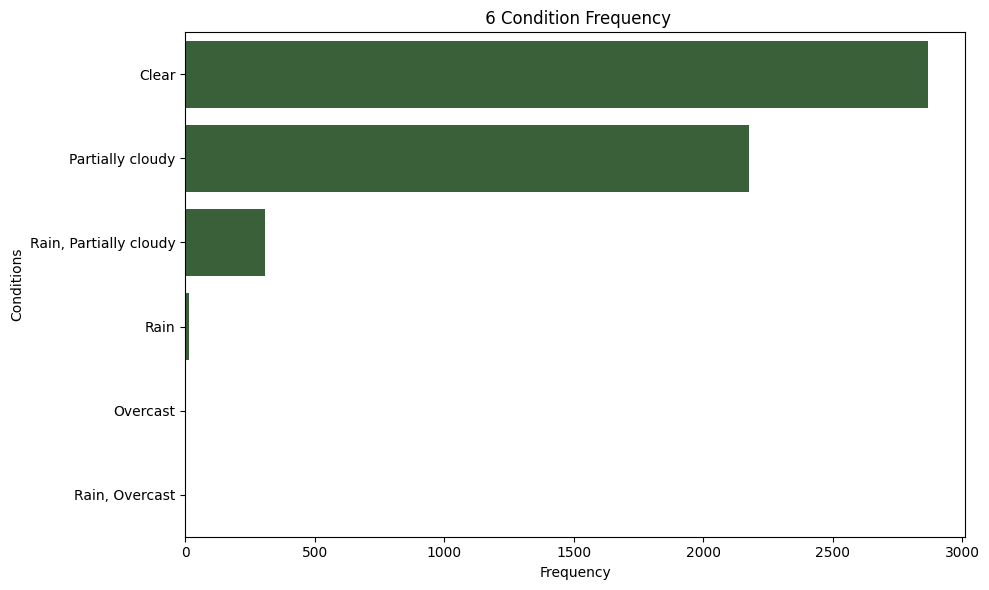

In [ ]:
n = len(data['conditions'].unique())
con = data['conditions'].value_counts().head(n)
color = (0.2, # redness
         0.4, # greenness
         0.2, # blueness
         0.6 # transparency
         )
plt.figure(figsize=(10, 6))
sns.barplot(x=con.values, y=con.index , color = color)
plt.title(f' {n} Condition Frequency')
plt.xlabel('Frequency')
plt.ylabel('Conditions')
plt.tight_layout()
plt.show()

###Plot temperature over time


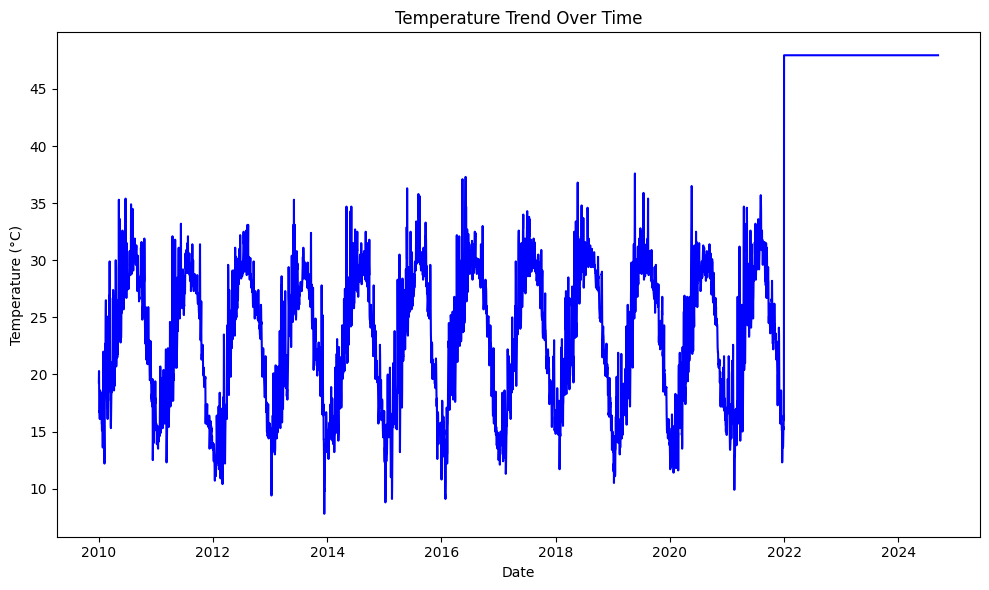

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=data['datetime'], y=data['temp'], color='blue')
plt.title('Temperature Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.tight_layout()
plt.show()


### Temperature vs. Humidity


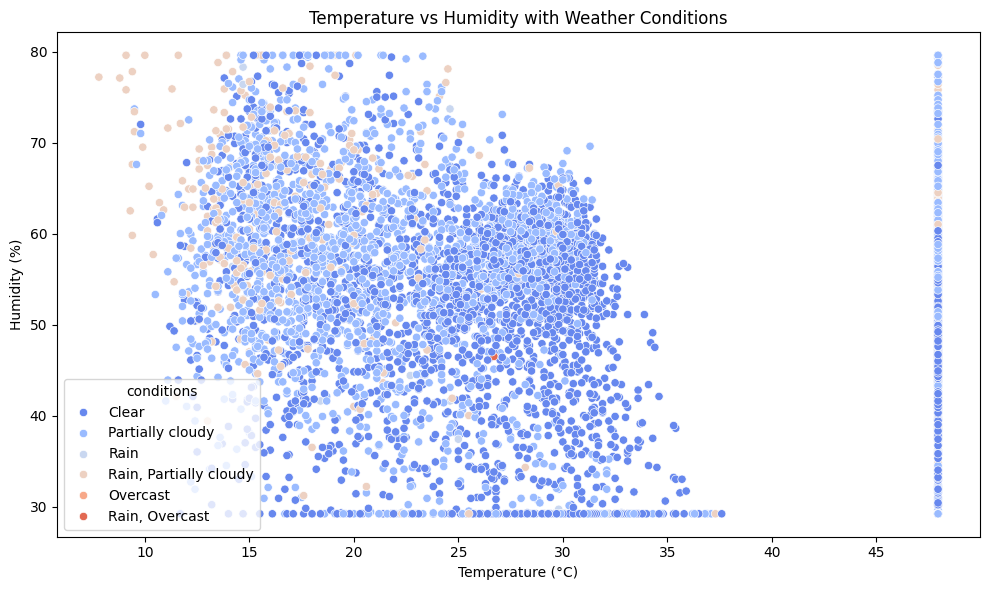

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['temp'], y=data['humidity'], hue=data['conditions'], palette='coolwarm')
plt.title('Temperature vs Humidity with Weather Conditions')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.tight_layout()
plt.show()


## Insight:
This graph helps visualize the relationship between temperature and humidity, colored by weather conditions. For example, clear days might have low humidity, while cloudy days could have higher humidity levels.

### Wind Speed and Wind Gust Analysis


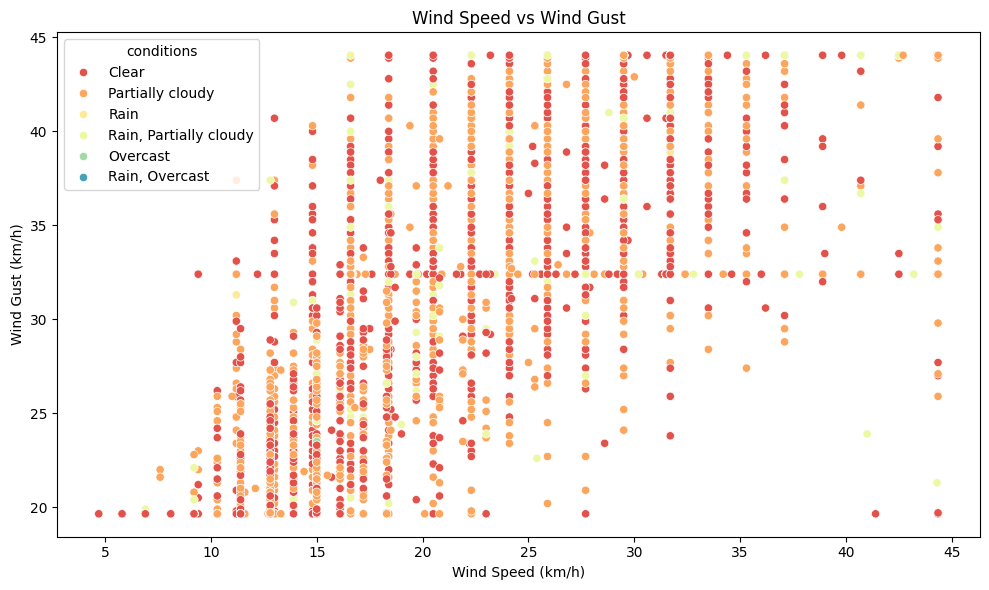

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['windspeed'], y=data['windgust'], hue=data['conditions'], palette='Spectral')
plt.title('Wind Speed vs Wind Gust')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Wind Gust (km/h)')
plt.tight_layout()
plt.show()


## Insight:
This plot can reveal how gusty certain weather conditions are. For instance, clear or calm days might have lower gusts compared to stormy or windy conditions.

###  Cloud Cover vs. Solar Radiation


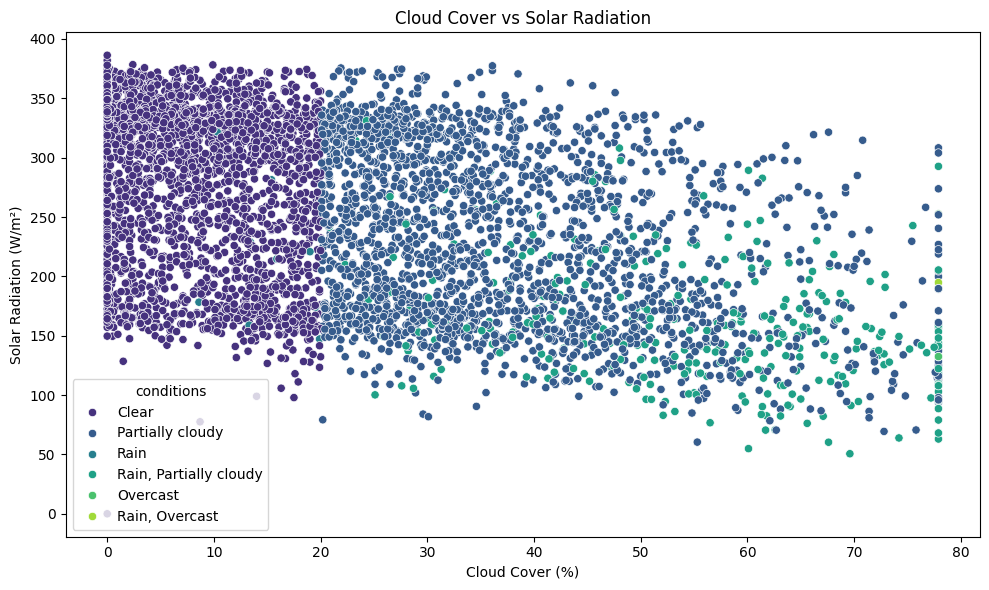

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['cloudcover'], y=data['solarradiation'], hue=data['conditions'], palette='viridis')
plt.title('Cloud Cover vs Solar Radiation')
plt.xlabel('Cloud Cover (%)')
plt.ylabel('Solar Radiation (W/m²)')
plt.tight_layout()
plt.show()


## Insight:
This examines how cloud cover impacts solar radiation. Days with high cloud cover typically receive less solar radiation.

This relationship is critical for energy sectors, especially for predicting solar energy output on cloudy days.

### Visibility and Conditions

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


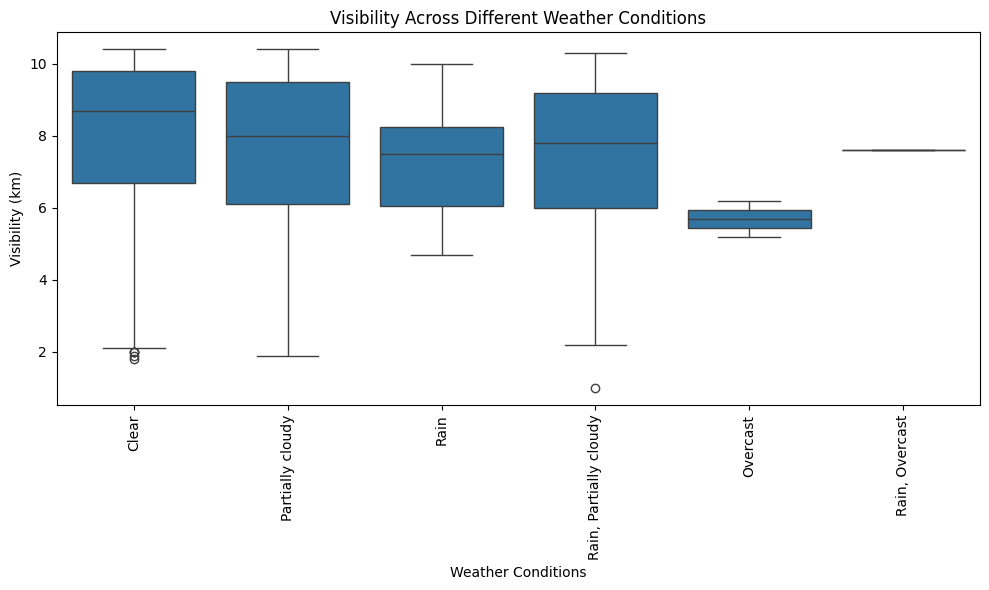

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['conditions'], y=data['visibility'])
plt.title('Visibility Across Different Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Visibility (km)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Insight:
This plot helps to understand how different weather conditions impact visibility. For example, clear days usually have higher visibility, while foggy or rainy conditions reduce visibility.

### Solar Energy by Month

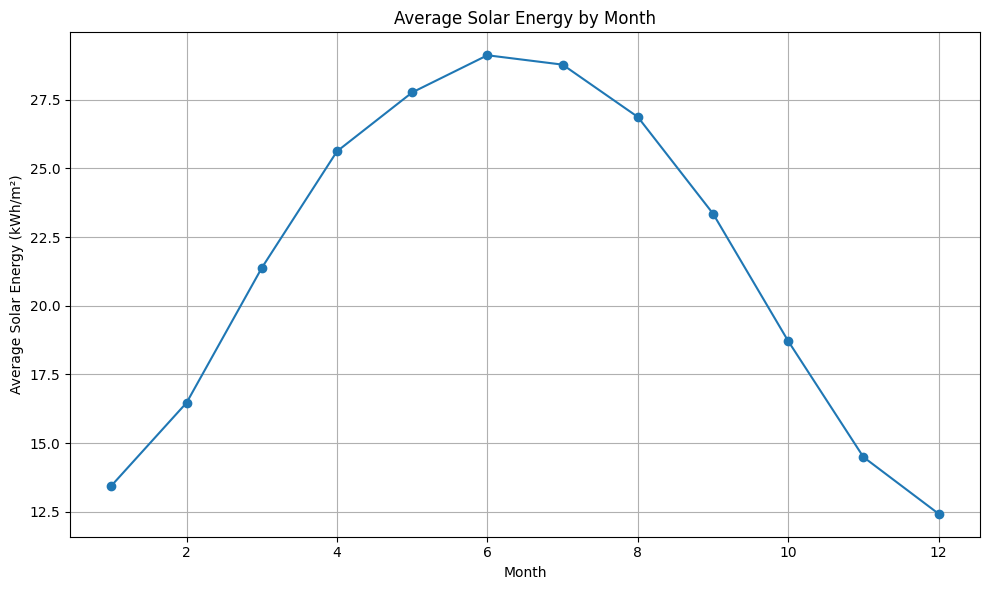

In [ ]:
# Grouping data by month to get average solar energy for each month
monthly_avg = data.groupby('Month')['solarenergy'].mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.title('Average Solar Energy by Month')
plt.xlabel('Month')
plt.ylabel('Average Solar Energy (kWh/m²)')
plt.grid(True)
plt.tight_layout()
plt.show()


## Insight:
This boxplot shows how solar energy changes throughout the year. You may observe higher energy in summer months ( June to August) and lower energy during winter months ( December to February)

###  Wind Direction Distribution

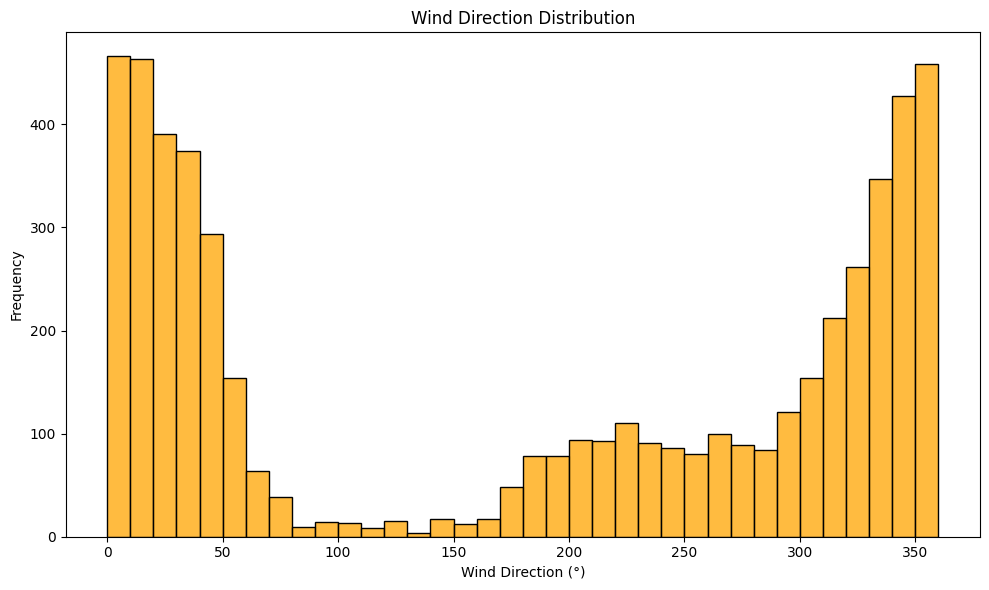

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['winddir'], bins=36, color='orange')
plt.title('Wind Direction Distribution')
plt.xlabel('Wind Direction (°)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## Insight:
This histogram shows the frequency of different wind directions, which can help determine prevailing winds in the area (e.g., most wind might come from the west or northwest).

### UV Index and Conditions

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


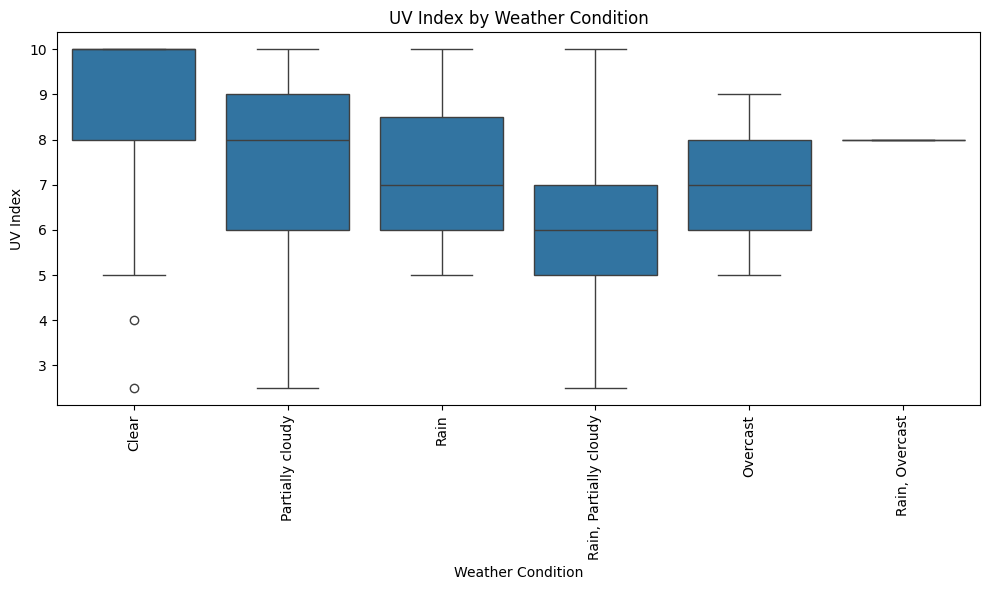

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['conditions'], y=data['uvindex'])
plt.title('UV Index by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('UV Index')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Insight:
 Clear days are likely to have a higher UV index compared to cloudy or overcast days, indicating more exposure to ultraviolet rays.

### Temperature, Sunrise, and Sunset Timing

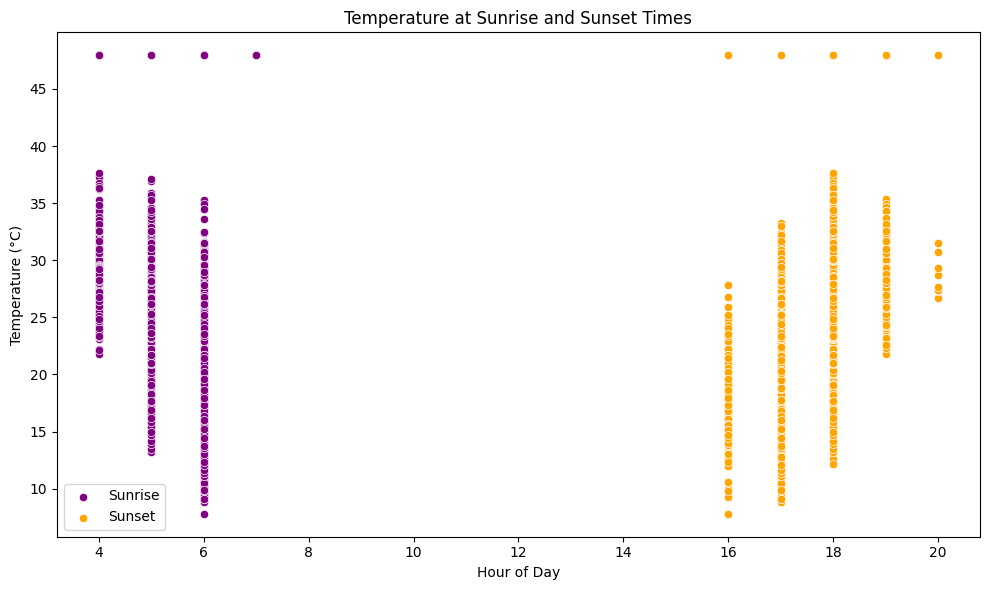

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pd.to_datetime(data['sunrise']).dt.hour, y=data['temp'], color='purple', label='Sunrise')
sns.scatterplot(x=pd.to_datetime(data['sunset']).dt.hour, y=data['temp'], color='orange', label='Sunset')
plt.title('Temperature at Sunrise and Sunset Times')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature (°C)')
plt.tight_layout()
plt.legend()
plt.show()


## Insight:
This visualization shows how temperature varies throughout the day relative to sunrise and sunset times. You might notice how temperatures start rising after sunrise and fall after sunset.

In [ ]:
data.drop(['datetime'],axis=1,inplace=True)

In [ ]:
data.sample(10)

,temp,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,icon,Day,Month,Year
3219,26.10,13.4,47.1,44.05,44.35,249.2,1008.4,13.4,5.4,205.8,17.6,7.0,2018-10-25 06:03:32,2018-10-25 17:14:18,0.53,Clear,clear-day,25,10,2018
5144,47.95,36.2,57.5,20.40,17.20,224.2,1021.0,48.3,4.6,138.8,11.6,7.0,2024-02-01 06:45:54,2024-02-01 17:31:39,0.72,Partially cloudy,partly-cloudy-day,1,2,2024
4920,47.95,36.2,55.9,25.30,17.20,3.3,1009.8,42.4,5.1,341.9,28.2,10.0,2023-06-22 05:54:37,2023-06-22 19:59:29,0.14,Partially cloudy,partly-cloudy-day,22,6,2023
1907,17.20,3.2,44.1,33.80,18.40,49.4,1017.9,69.4,10.0,207.7,17.3,8.0,2015-03-23 05:55:51,2015-03-23 18:08:04,0.10,Partially cloudy,partly-cloudy-day,23,3,2015
495,26.10,7.4,34.3,32.40,31.30,216.9,1009.7,9.3,10.0,356.1,29.5,10.0,2011-05-11 05:04:35,2011-05-11 18:38:40,0.29,Clear,clear-day,11,5,2011
1905,16.30,6.7,55.0,39.60,16.60,338.1,1018.2,23.8,9.5,292.2,24.1,9.0,2015-03-21 05:58:16,2015-03-21 18:06:51,0.03,Partially cloudy,partly-cloudy-day,21,3,2015
461,21.50,7.4,45.1,32.40,33.50,99.1,1009.8,25.5,8.1,309.6,25.4,10.0,2011-04-07 05:37:53,2011-04-07 18:17:10,0.13,Partially cloudy,partly-cloudy-day,7,4,2011
1081,15.50,8.2,62.1,32.40,14.80,203.0,1019.4,16.6,10.1,159.8,13.7,6.0,2012-12-17 06:44:53,2012-12-17 16:57:44,0.13,Clear,clear-day,17,12,2012
2241,19.80,12.8,64.6,29.20,20.50,334.4,1018.4,44.4,10.0,217.0,18.7,8.0,2016-02-20 06:31:02,2016-02-20 17:47:04,0.42,Partially cloudy,partly-cloudy-day,20,2,2016
2947,11.70,6.8,72.1,44.05,35.30,244.5,1017.7,77.9,9.5,153.4,13.2,6.0,2018-01-26 06:48:40,2018-01-26 17:26:47,0.32,"Rain, Partially cloudy",rain,26,1,2018


In [ ]:
data.head()

,temp,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,icon,Day,Month,Year
0,19.3,11.4,61.9,32.4,14.8,205.0,1019.1,6.5,5.8,168.3,14.6,6.0,2010-01-01 06:51:08,2010-01-01 17:06:05,0.52,Clear,clear-day,1,1,2010
1,20.3,9.1,50.2,32.4,27.7,202.2,1016.5,14.2,5.1,164.3,14.2,6.0,2010-01-02 06:51:22,2010-01-02 17:06:48,0.56,Clear,clear-day,2,1,2010
2,18.6,9.7,56.3,32.4,16.6,263.0,1017.0,11.1,8.4,166.1,14.2,6.0,2010-01-03 06:51:34,2010-01-03 17:07:32,0.59,Clear,clear-day,3,1,2010
3,16.7,10.6,68.1,32.4,13.0,324.2,1018.8,17.6,6.8,169.2,14.6,6.0,2010-01-04 06:51:45,2010-01-04 17:08:16,0.62,Clear,clear-day,4,1,2010
4,16.8,11.0,70.0,32.4,20.5,34.0,1020.1,19.8,6.1,168.5,14.7,6.0,2010-01-05 06:51:54,2010-01-05 17:09:01,0.66,Clear,clear-day,5,1,2010


In [ ]:
data.to_csv('cleaned_data.csv', index=False)

In [ ]:
data2 = pd.read_csv('cleaned_data.csv')

In [ ]:
data2.drop(['icon'],axis=1,inplace=True)

In [ ]:
obj=data2.select_dtypes(include="object")
num=data2.select_dtypes(exclude="object")
lab = LabelEncoder()
obj = obj.apply(lambda col: lab.fit_transform(col) if col.dtype == 'object' else col)
data2=pd.concat([obj,num],axis=1)

In [ ]:
data2.dtypes

,0
sunrise,int64
sunset,int64
conditions,int64
temp,float64
dew,float64
humidity,float64
windgust,float64
windspeed,float64
winddir,float64
sealevelpressure,float64


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entries, 0 to 5367
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sunrise           5368 non-null   int64  
 1   sunset            5368 non-null   int64  
 2   conditions        5368 non-null   int64  
 3   temp              5368 non-null   float64
 4   dew               5368 non-null   float64
 5   humidity          5368 non-null   float64
 6   windgust          5368 non-null   float64
 7   windspeed         5368 non-null   float64
 8   winddir           5368 non-null   float64
 9   sealevelpressure  5368 non-null   float64
 10  cloudcover        5368 non-null   float64
 11  visibility        5368 non-null   float64
 12  solarradiation    5368 non-null   float64
 13  solarenergy       5368 non-null   float64
 14  uvindex           5368 non-null   float64
 15  moonphase         5368 non-null   float64
 16  Day               5368 non-null   int64  


#Modeling

In [ ]:
X = data2.drop(['temp'], axis=1)
y = data2['temp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Linear Regression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
#r2_adj_lr = 1 - (1 - r2_lr) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mse_lr = mean_squared_error(y_test, y_pred_lr)


print(f'Linear Regression - R² Score: {r2_lr:.5f}')
#print(f'Linear Regression - Adjusted R² Score: {r2_adj_lr:.5f}')
print(f'Linear Regression - Mean Squared Error: {mse_lr:.5f}')

Linear Regression - R² Score: 0.96251
Linear Regression - Mean Squared Error: 4.63278


##KNN

In [ ]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

r2_knn = r2_score(y_test, y_pred_knn)
#r2_adj_knn = 1 - (1 - r2_knn) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mse_knn = mean_squared_error(y_test, y_pred_knn)

print(f'KNN - R² Score: {r2_knn:.5f}')
#print(f'KNN - Adjusted R² Score: {r2_adj_knn:.5f}')
print(f'KNN - Mean Squared Error: {mse_knn:.5f}')

KNN - R² Score: 0.96321
KNN - Mean Squared Error: 4.54734


##SVR

In [ ]:
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)

print(f'SVR - R² Score: {r2_svr:.5f}')
print(f'SVR - Mean Squared Error: {mse_svr:.5f}')

SVR - R² Score: 0.68788
SVR - Mean Squared Error: 38.57323


##Desicion Tree

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print(f'Decision Tree Regression - R² Score: {r2_dt:.5f}')
print(f'Decision Tree Regression - Mean Squared Error: {mse_dt:.5f}')

Decision Tree Regression - R² Score: 0.98281
Decision Tree Regression - Mean Squared Error: 2.12432


##Random Forest Regressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
#r2_adj_rf = 1 - (1 - r2_rf) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f'Random Forest Regression - R² Score: {r2_rf:.5f}')
#print(f'Random Forest Regression - Adjusted R² Score: {r2_adj_rf:.5f}')
print(f'Random Forest Regression - Mean Squared Error: {mse_rf:.5f}')

Random Forest Regression - R² Score: 0.99320
Random Forest Regression - Mean Squared Error: 0.84081


#Models Comparison

<ipython-input-87-c6ee74cd9204>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R² Score', data=results_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

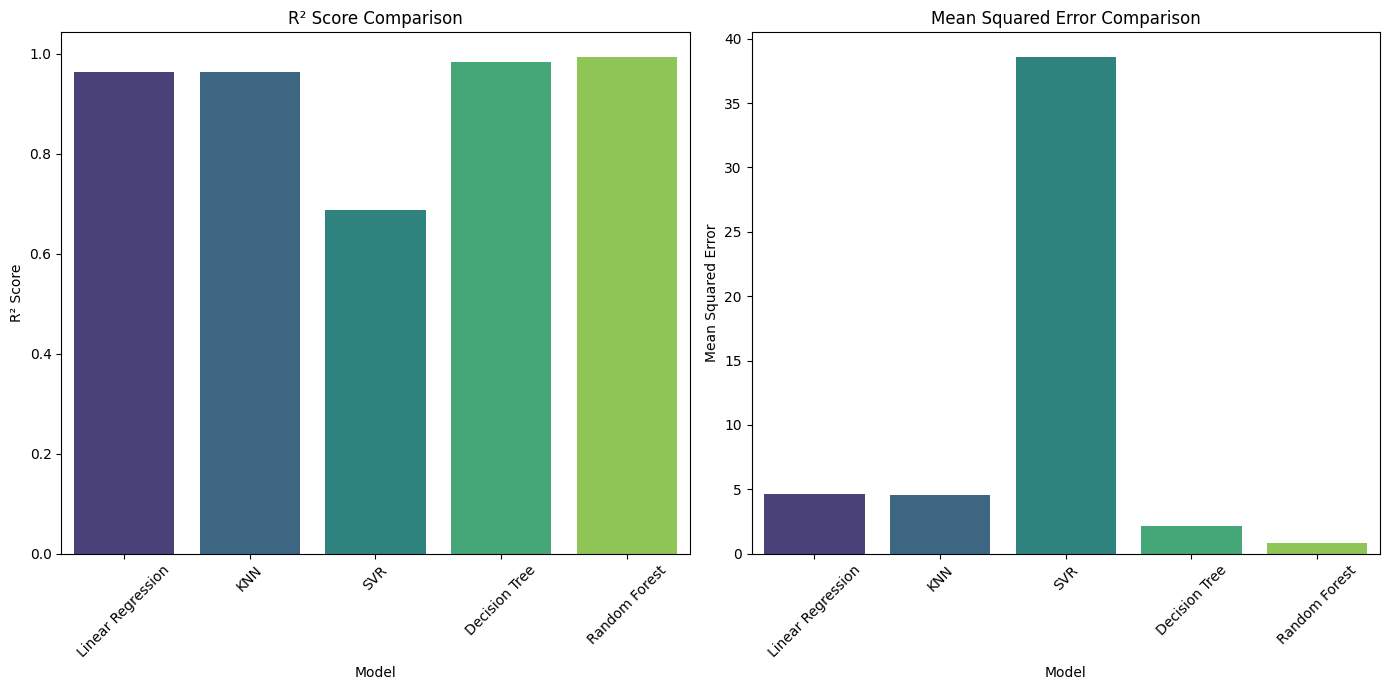

In [ ]:
results = {
    'Model': ['Linear Regression', 'KNN', 'SVR', 'Decision Tree','Random Forest'],
    'R² Score': [r2_lr, r2_knn, r2_svr, r2_dt,r2_rf],
    'Mean Squared Error': [mse_lr, mse_knn, mse_svr, mse_dt, mse_rf]
}

results_df = pd.DataFrame(results)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='R² Score', data=results_df, palette='viridis')
plt.xticks(rotation=45)
plt.title('R² Score Comparison')

plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='Mean Squared Error', data=results_df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Mean Squared Error Comparison')

plt.tight_layout()
plt.show()
